### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4
# Задача классификации
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022

##### Вариант 1 

Annealing Data Set 

Название файла: anneal.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/ 

Первый признак: thick (столбец No 33) 

Второй признак: width (столбец No 34) 

Третий признак: len (столбец No 35) 

Класс: classes (столбец No 39) 

Метод обработки пропущенных значений – среднее значение признака 

Метод нормализации признаков – масштабирование на интервал [0, 1] 

Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией 

Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 10 блокам 

Показатель качества модели – F-мера (f1) 

#### Задание 1
Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

Annealing Data Set   
Первый признак: thick (столбец No 33)   
Второй признак: width (столбец No 34)  
Третий признак: len (столбец No 35) 

Класс: classes (столбец No 39) 

In [1]:
import pandas as pd

my_data = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data", header = None)
my_data = my_data[[32, 33, 34, 38]]
my_data.columns = ['thick', 'width', 'len', 'classes']
my_data[10:20]

,thick,width,len,classes
10,1.200,610.0,0,3
11,0.300,1320.0,4880,3
12,1.200,610.0,150,3
13,1.200,609.9,0,3
14,0.600,1220.0,761,3
15,4.000,1320.0,762,3
16,3.201,600.0,0,U
17,0.800,610.0,4170,U
18,3.200,1320.1,762,3
19,0.501,1200.1,0,3


#### Задание 2
Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.

*Метод обработки пропущенных значений – среднее значение признака*


В метках класса есть значение U - удалим все записи с этой меткой.

Удалим все признаки относящиеся к классу U (unknown?)

In [2]:
list_ind = []
for i in range(len(my_data)):
    if my_data['classes'][i] == 'U':
        list_ind.append(i)

my_data = my_data.drop(list_ind)

In [3]:
new_index = [i for i in range(len(my_data))]
my_data = my_data.reset_index(drop=True)
my_data[10:20]

,thick,width,len,classes
10,1.200,610.0,0,3
11,0.300,1320.0,4880,3
12,1.200,610.0,150,3
13,1.200,609.9,0,3
14,0.600,1220.0,761,3
15,4.000,1320.0,762,3
16,3.200,1320.1,762,3
17,0.501,1200.1,0,3
18,0.600,610.0,761,3
19,0.800,610.0,0,3


Проверяем количество уникальных значений меток:

In [4]:
my_data['classes'].unique()

array(['3', '1', '5', '2'], dtype=object)

Посчитаем средние значения len для каждого класса:

In [5]:
sum1 = 0
count1 = 0
sum2 = 0
count2 = 0
sum3 = 0
count3 = 0
sum5 = 0
count5 = 0
for i in range(len(my_data)):
    if my_data['len'][i] != 0 or my_data['classes'][i] == '1':
        if my_data['classes'][i] == '1':
            sum1 += my_data['len'][i]
            count1 += 1
        if my_data['classes'][i] == '2':
            sum2 += my_data['len'][i]
            count2 += 1
        if my_data['classes'][i] == '3':
            sum3 += my_data['len'][i]
            count3 += 1
        if my_data['classes'][i] == '5':
            sum5 += my_data['len'][i]
            count5 += 1
mean1 = sum1/count1
mean2 = sum2/count2
mean3 = sum3/count3
mean5 = sum5/count5
print(f"Среднее значение len класса 1 = {mean1}")
print(f"Среднее значение len класса 2 = {mean2}")
print(f"Среднее значение len класса 3 = {mean3}")
print(f"Среднее значение len класса 5 = {mean5}")

Среднее значение len класса 1 = 0.0
Среднее значение len класса 2 = 2285.625
Среднее значение len класса 3 = 2493.006451612903
Среднее значение len класса 5 = 1702.96875


Заполним пропущенные значения (нули) средними значениями

In [6]:
for i in range(len(my_data)):
    if my_data.loc[i, 'len'] == 0:
        if my_data['classes'][i] == '2':
            my_data.loc[i, 'len'] = mean2
        elif my_data['classes'][i] == '3':
            my_data.loc[i, 'len'] = mean3
        elif my_data['classes'][i] == '5':
            my_data.loc[i, 'len'] = mean5            

In [7]:
my_data.head(10)

,thick,width,len,classes
0,0.700,610.0,2493.006452,3
1,3.200,610.0,2493.006452,3
2,0.700,1300.0,762.000000,3
3,2.801,385.1,2493.006452,3
4,0.801,255.0,269.000000,3
5,1.600,610.0,2493.006452,3
6,0.699,610.0,4880.000000,3
7,3.300,152.0,2493.006452,3
8,0.699,1320.0,2493.006452,3
9,1.000,1320.0,762.000000,3


#### Задание 3
Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

*Метод нормализации признаков – масштабирование на интервал [0, 1]*

In [8]:
from sklearn.preprocessing import MinMaxScaler

X = my_data[['thick', 'width', 'len']].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.12      , 0.4       , 0.51086198],
       [0.78666667, 0.4       , 0.51086198],
       [0.12      , 0.85245902, 0.15614754],
       ...,
       [0.04      , 0.39993443, 0.51086198],
       [0.78666667, 0.4       , 1.        ],
       [0.35973333, 0.98360656, 0.8545082 ]])

#### Задание 4
Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [9]:
y = my_data['classes'].to_numpy()

In [10]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

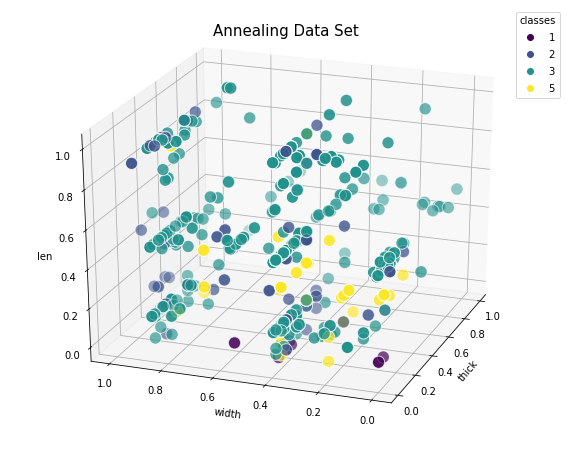

In [11]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
scatter = ax.scatter(xs, ys, zs, c=y.astype(float), edgecolors = 'w', s=150)
ax.set_xlabel('thick')
ax.set_ylabel('width')
ax.set_zlabel('len')
ax.set_title('Annealing Data Set',fontsize=15)
ax.legend(*scatter.legend_elements(), loc="upper right", title = 'classes')
ax.view_init( azim=-160, elev=25 );

#### Задание 5
Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

*Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией*

In [12]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(0.07))
X_2 = selector.fit_transform(X)
X_2

array([[0.4       , 0.51086198],
       [0.4       , 0.51086198],
       [0.85245902, 0.15614754],
       ...,
       [0.39993443, 0.51086198],
       [0.4       , 1.        ],
       [0.98360656, 0.8545082 ]])

Остались признаки width и len

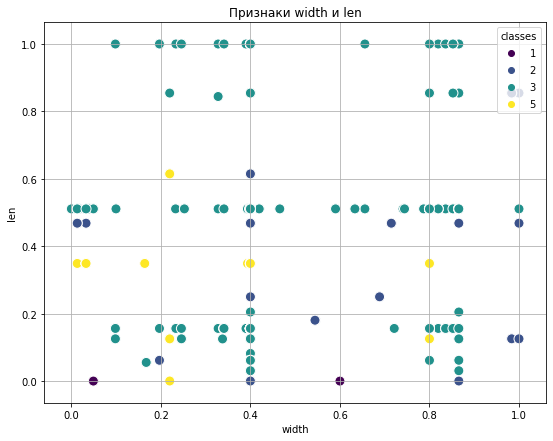

In [13]:
fig, ax = plt.subplots(figsize=(9,7))

ax.scatter(X_2[:,0], X_2[:,1], edgecolors='w',c = y.astype(float),s=100)
ax.legend(*scatter.legend_elements(), loc="upper right", title = 'classes')
plt.grid(True)
plt.title('Признаки width и len')
plt.xlabel('width')
plt.ylabel('len')
plt.show()

#### Задание 6
Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок. 

In [14]:
X_2.shape, y.shape

((764, 2), (764,))

Реализуем разделение с помощью библиотеки scikit-learn

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((573, 2), (573,), (191, 2), (191,))

Определим оптимальное значение параметра K для метода K ближайших соседей.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0
best_k = -1
for k in range(1, 10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
        
print("Лучшее k =", best_k)
print("Лучшая оценка =", best_score)

Лучшее k = 3
Лучшая оценка = 0.8534031413612565


#### Задание 7
Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.


In [17]:
kNN_clf = KNeighborsClassifier(n_neighbors=best_k) # создаем классификатор
kNN_clf.fit(X_train, y_train) # обучаем классификатор

y_pred = kNN_clf.predict(X_test)

Отчет о классификации:

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.64      0.32      0.42        22
           3       0.88      0.99      0.93       152
           5       0.80      0.27      0.40        15

    accuracy                           0.85       191
   macro avg       0.70      0.64      0.60       191
weighted avg       0.84      0.85      0.83       191



Матрица ошибок:

In [19]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[  2   0   0   0]
 [  2   7  13   0]
 [  0   1 150   1]
 [  0   3   8   4]]


#### Задание 8
Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
    * наивного байесовского классификатора  
    * классификатора метода К ближайших соседей для значения К, определенного в п. 6.

Сделаем обучающую и тестовую выборки для трех признаков:

In [20]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((573, 3), (573,), (191, 3), (191,))

Наивный байесовский классификатор:

In [21]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train2,y_train2);

Результат:

In [22]:
y_pred2 = nbc.predict(X_test2)

mislabel = np.sum((y_test2!=y_pred2))
print("Неправильно клас. т. {} из {}".format(mislabel,len(y_test2)))

Неправильно клас. т. 37 из 191


Классификатор метода К ближайших соседей для значения К=3

In [23]:
kNN_clf.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

Результат:

In [24]:
y_pred2_k = kNN_clf.predict(X_test2)

mislabel_k = np.sum((y_test2!=y_pred2_k))
print("Неправильно клас. т. {} из {}".format(mislabel_k,len(y_test2)))

Неправильно клас. т. 23 из 191


#### Задание 9
Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

*Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 10 блокам*  
*Показатель качества модели – F-мера (f1)*

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.model_selection import ShuffleSplit

kfold_split = ShuffleSplit(n_splits=10, test_size=0.25)

results_split_nbc = cross_val_score(nbc, X, y, scoring='f1_macro', cv=kfold_split)
results_split_kNN = cross_val_score(kNN_clf, X, y, scoring='f1_macro', cv=kfold_split)

print(f"Наивный байесовский классификатор\n\tСреднее значение = {results_split_nbc.mean()}\n\tДисперсия = {results_split_nbc.var()}")
print(f"Классификатор метода К ближайших соседей\n\tСреднее значение = {results_split_kNN.mean()}\n\tДисперсия = {results_split_kNN.var()}")

Наивный байесовский классификатор
	Среднее значение = 0.45480954250465294
	Дисперсия = 0.0028650173100459924
Классификатор метода К ближайших соседей
	Среднее значение = 0.7152217367019248
	Дисперсия = 0.006325129798840937


#### Задание 10
Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Классификатор метода K ближайших соседей дает более высокое среднее значение показателя классификации.  
Проведем классификацию всего набора данных:

In [27]:
y_predict = kNN_clf.predict(X)

Визуализируем полученные значения

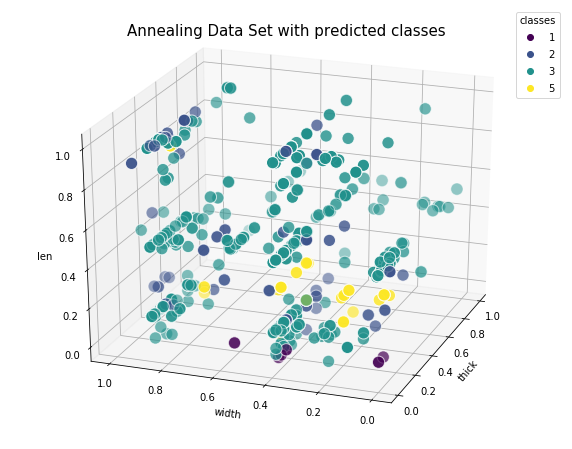

In [28]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
scatter = ax.scatter(xs, ys, zs, c=y_predict.astype(float), edgecolors = 'w', s=150)
ax.set_xlabel('thick')
ax.set_ylabel('width')
ax.set_zlabel('len')
ax.set_title('Annealing Data Set with predicted classes',fontsize=15)
ax.legend(*scatter.legend_elements(), loc="upper right", title = 'classes')
ax.view_init( azim=-160, elev=25 );